In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"D:\Health Care Anaysis/Data Set.csv")

In [7]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,31/01/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,02/02/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,20/08/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,26/08/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,22/09/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,07/10/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,18/11/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,18/12/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,19/09/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,09/10/2022,Penicillin,Abnormal


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [11]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

<h1>4.1 Admission and Treatement Analysis</h1>
<h3>4.1.1 Admission Type Analysis</h3>
<h4>Outcome Comparison</h4>

In [16]:
# Convert 'Date of Admission' and 'Discharge Date' to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format='%d/%m/%Y')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%d/%m/%Y')

# Calculate the length of stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Group by Admission Type and analyze discharge status
admission_outcome = df.groupby('Admission Type')['Discharge Date'].count().reset_index(name='Total Admissions')
admission_outcome['Average Length of Stay'] = df.groupby('Admission Type')['Length of Stay'].mean().values

print(admission_outcome)

  Admission Type  Total Admissions  Average Length of Stay
0       Elective             18655               15.525328
1      Emergency             18269               15.595052
2         Urgent             18576               15.408000


<p style="color: Orange">Admission Type | Total Admissions | Average Length of Stay(Days)</p>
<span style="color: Red">
<p>Elective       |      18655        |       15.525328</p>
<p>Emergency      |       18269       |        15.595052</p>
<p> Urgent        |    18576          |     15.408000</p>
</span>

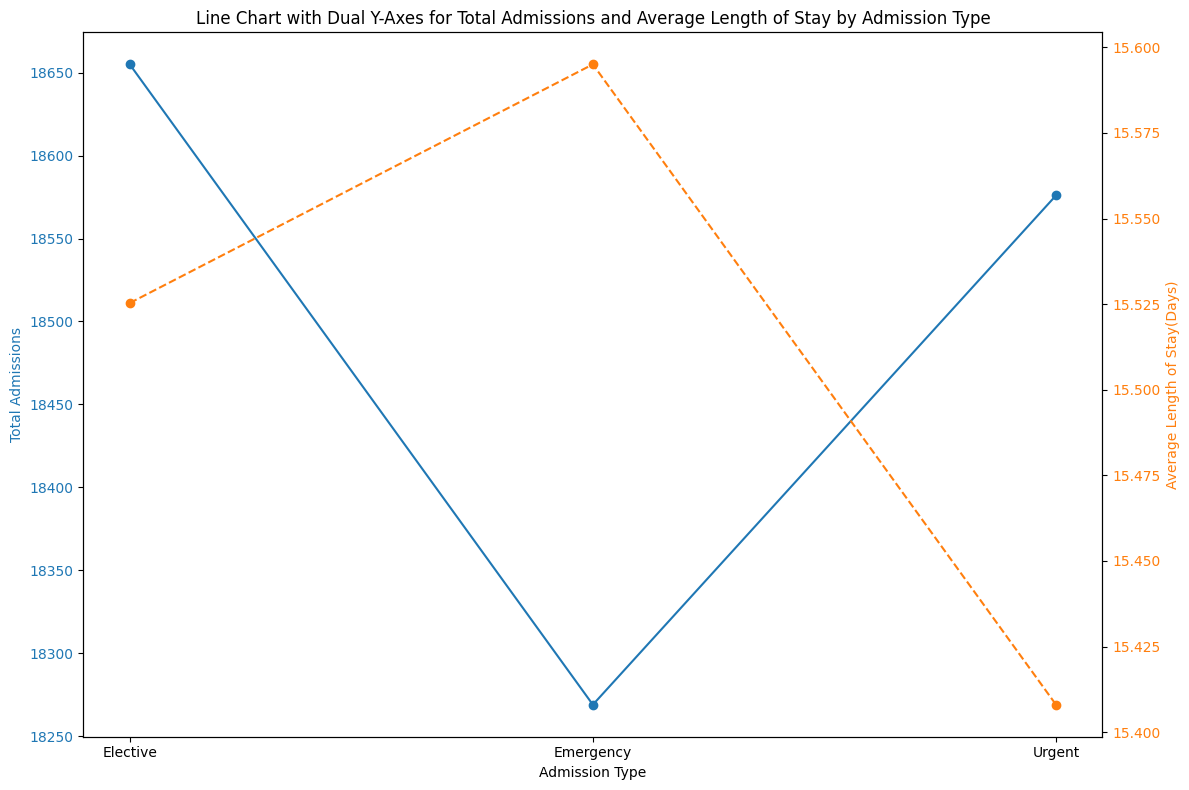

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot total admissions on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Admission Type')
ax1.set_ylabel('Total Admissions', color=color)
ax1.plot(admission_outcome['Admission Type'], admission_outcome['Total Admissions'], color=color, marker='o', label='Total Admissions')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for average length of stay
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Average Length of Stay(Days)', color=color)
ax2.plot(admission_outcome['Admission Type'], admission_outcome['Average Length of Stay'], color=color, marker='o', linestyle='--', label='Average Length of Stay')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Line Chart with Dual Y-Axes for Total Admissions and Average Length of Stay by Admission Type')
fig.tight_layout()
plt.show()

<h4>Condition-Specific Admissions</h4>

In [18]:
 # Group by Medical Condition and Admission Type
condition_admission = df.groupby(['Medical Condition', 'Admission Type']).size().unstack().fillna(0)

# Print the table for insight
print(condition_admission)

Admission Type     Elective  Emergency  Urgent
Medical Condition                             
Arthritis              3083       3108    3117
Asthma                 3102       3002    3081
Cancer                 3148       3015    3064
Diabetes               3058       3017    3229
Hypertension           3221       3001    3023
Obesity                3043       3126    3062


<table border="1" cellpadding="5" cellspacing="0">
  <thead>
    <tr>
      <th>Medical Condition</th>
      <th>Elective</th>
      <th>Emergency</th>
      <th>Urgent</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Arthritis</td>
      <td>3083</td>
      <td>3108</td>
      <td>3117</td>
    </tr>
    <tr>
      <td>Asthma</td>
      <td>3102</td>
      <td>3002</td>
      <td>3081</td>
    </tr>
    <tr>
      <td>Cancer</td>
      <td>3148</td>
      <td>3015</td>
      <td>3064</td>
    </tr>
    <tr>
      <td>Diabetes</td>
      <td>3058</td>
      <td>3017</td>
      <td>3229</td>
    </tr>
    <tr>
      <td>Hypertension</td>
      <td>3221</td>
      <td>3001</td>
      <td>3023</td>
    </tr>
    <tr>
      <td>Obesity</td>
      <td>3043</td>
      <td>3126</td>
      <td>3062</td>
    </tr>
  </tbody>
</table>

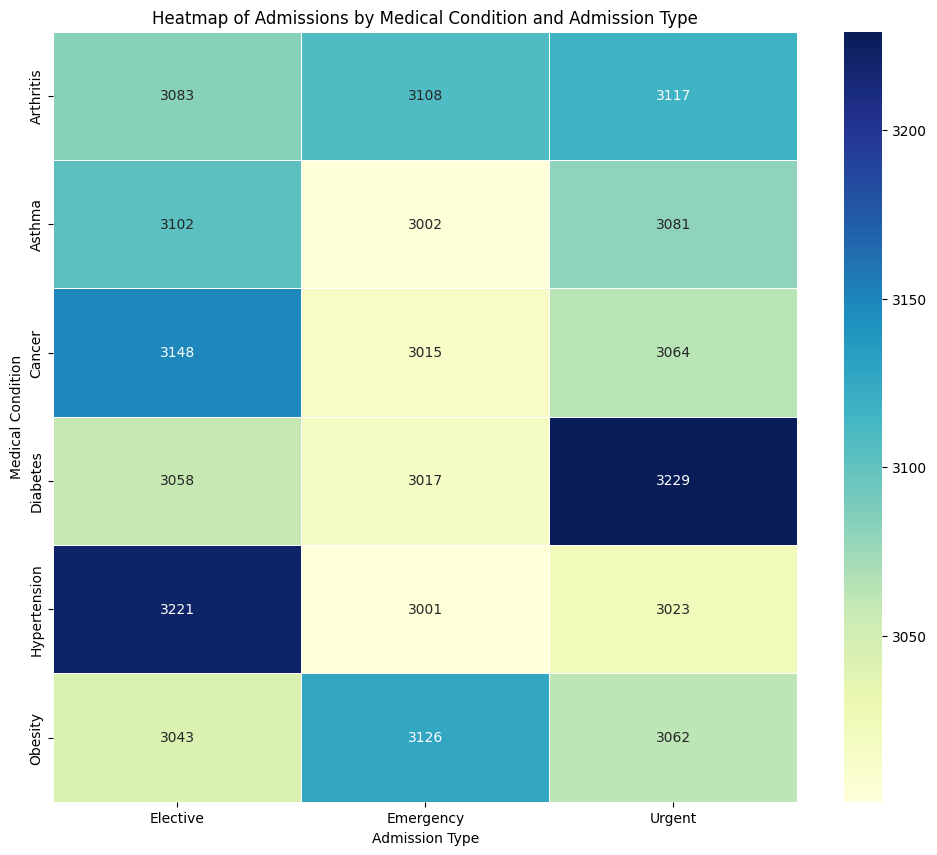

In [19]:
# Plotting a heatmap for conditions vs. admission types
plt.figure(figsize=(12, 10))
sns.heatmap(condition_admission, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap of Admissions by Medical Condition and Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Medical Condition')
plt.show()

<h3>4.1.2 Medication Analysis</h3>
<h4>Effectiveness Analysis</h4>

In [20]:
# Group by Medication and analyze test results
medication_effectiveness = df.groupby('Medication')['Test Results'].value_counts().unstack().fillna(0)

# Calculate effectiveness (percentage of "Normal" results)
medication_effectiveness['Percentage Normal'] = (medication_effectiveness['Normal'] / 
                                                  (medication_effectiveness['Normal'] + medication_effectiveness['Abnormal'] + medication_effectiveness['Inconclusive'])) * 100

print(medication_effectiveness)

Test Results  Abnormal  Inconclusive  Normal  Percentage Normal
Medication                                                     
Aspirin           3732          3624    3738          33.693889
Ibuprofen         3747          3645    3735          33.566999
Lipitor           3707          3746    3687          33.096948
Paracetamol       3737          3681    3653          32.996116
Penicillin        3704          3660    3704          33.465847


<table border="1" cellpadding="5" cellspacing="0">
  <thead>
    <tr>
      <th>Medication</th>
      <th>Abnormal</th>
      <th>Inconclusive</th>
      <th>Normal</th>
      <th>Percentage Normal</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Aspirin</td>
      <td>3732</td>
      <td>3624</td>
      <td>3738</td>
      <td>33.693889</td>
    </tr>
    <tr>
      <td>Ibuprofen</td>
      <td>3747</td>
      <td>3645</td>
      <td>3735</td>
      <td>33.566999</td>
    </tr>
    <tr>
      <td>Lipitor</td>
      <td>3707</td>
      <td>3746</td>
      <td>3687</td>
      <td>33.096948</td>
    </tr>
    <tr>
      <td>Paracetamol</td>
      <td>3737</td>
      <td>3681</td>
      <td>3653</td>
      <td>32.996116</td>
    </tr>
    <tr>
      <td>Penicillin</td>
      <td>3704</td>
      <td>3660</td>
      <td>3704</td>
      <td>33.465847</td>
    </tr>
  </tbody>
</table>

C:\Users\ahmad\AppData\Local\Temp\ipykernel_12624\2199394369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Percentage Normal', y=medication_effectiveness.index, data=medication_effectiveness, palette='viridis')


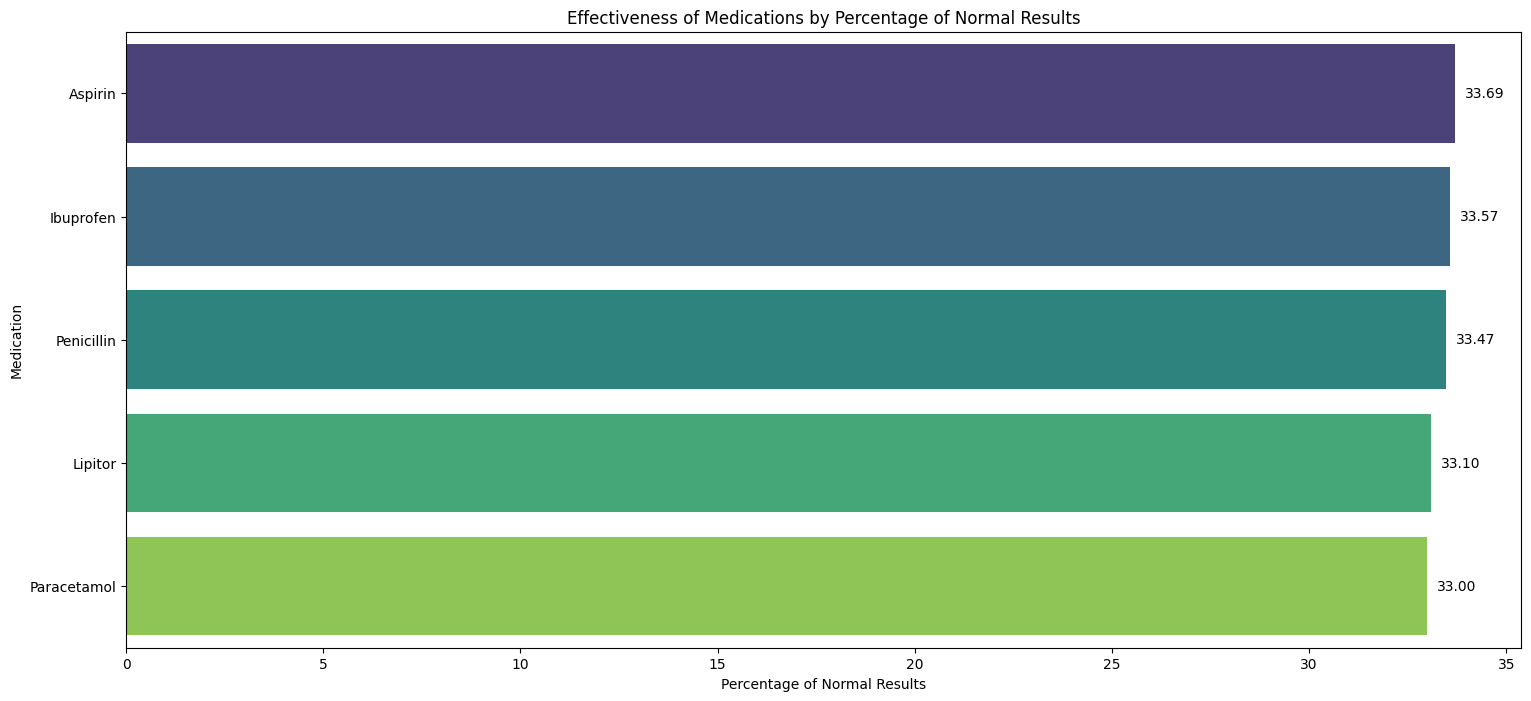

In [31]:
# Sorting medications by percentage of normal results
medication_effectiveness = medication_effectiveness.sort_values(by='Percentage Normal', ascending=False)

plt.figure(figsize=(18, 8))
bar_plot = sns.barplot(x='Percentage Normal', y=medication_effectiveness.index, data=medication_effectiveness, palette='viridis')
plt.title('Effectiveness of Medications by Percentage of Normal Results')
plt.xlabel('Percentage of Normal Results')
plt.ylabel('Medication')

# Annotate each bar with its value
for p in bar_plot.patches:
    width = p.get_width()
    bar_plot.text(width+ 0.25, p.get_y() + p.get_height() / 2,
                  f'{width:.2f}', 
                  ha='left', va='center')

plt.show()

<h4>Common Medication Analysis</h4>

In [32]:
# Group by Medical Condition and Medication
common_medications = df.groupby(['Medical Condition', 'Medication']).size().unstack().fillna(0)

print(common_medications)

Medication         Aspirin  Ibuprofen  Lipitor  Paracetamol  Penicillin
Medical Condition                                                      
Arthritis             1918       1822     1825         1877        1866
Asthma                1802       1827     1823         1888        1845
Cancer                1786       1873     1922         1853        1793
Diabetes              1858       1861     1893         1811        1881
Hypertension          1865       1893     1848         1849        1790
Obesity               1865       1851     1829         1793        1893


<table border="1" cellpadding="5" cellspacing="0">
  <thead>
    <tr>
      <th>Medical Condition</th>
      <th>Aspirin</th>
      <th>Ibuprofen</th>
      <th>Lipitor</th>
      <th>Paracetamol</th>
      <th>Penicillin</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Arthritis</td>
      <td>1918</td>
      <td>1822</td>
      <td>1825</td>
      <td>1877</td>
      <td>1866</td>
    </tr>
    <tr>
      <td>Asthma</td>
      <td>1802</td>
      <td>1827</td>
      <td>1823</td>
      <td>1888</td>
      <td>1845</td>
    </tr>
    <tr>
      <td>Cancer</td>
      <td>1786</td>
      <td>1873</td>
      <td>1922</td>
      <td>1853</td>
      <td>1793</td>
    </tr>
    <tr>
      <td>Diabetes</td>
      <td>1858</td>
      <td>1861</td>
      <td>1893</td>
      <td>1811</td>
      <td>1881</td>
    </tr>
    <tr>
      <td>Hypertension</td>
      <td>1865</td>
      <td>1893</td>
      <td>1848</td>
      <td>1849</td>
      <td>1790</td>
    </tr>
    <tr>
      <td>Obesity</td>
      <td>1865</td>
      <td>1851</td>
      <td>1829</td>
      <td>1793</td>
      <td>1893</td>
    </tr>
  </tbody>
</table>

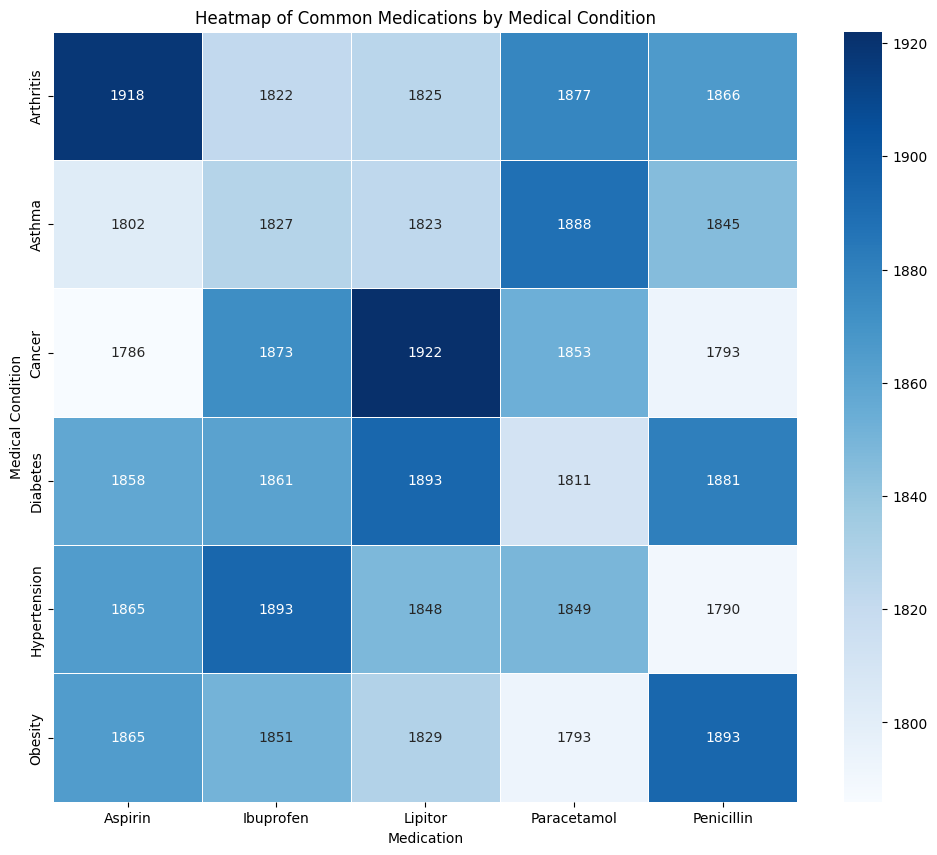

In [34]:
# Plotting a heatmap for medications by medical condition
plt.figure(figsize=(12, 10))
sns.heatmap(common_medications, cmap='Blues', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap of Common Medications by Medical Condition')
plt.xlabel('Medication')
plt.ylabel('Medical Condition')
plt.show()

<h3>4.1.3 Length of Stay Analysis</h3>
<h4>Calculate Length of Stay and Analyze</h4>

C:\Users\ahmad\AppData\Local\Temp\ipykernel_12624\913705429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Medical Condition', y='Length of Stay', data=length_of_stay_analysis, palette='viridis')


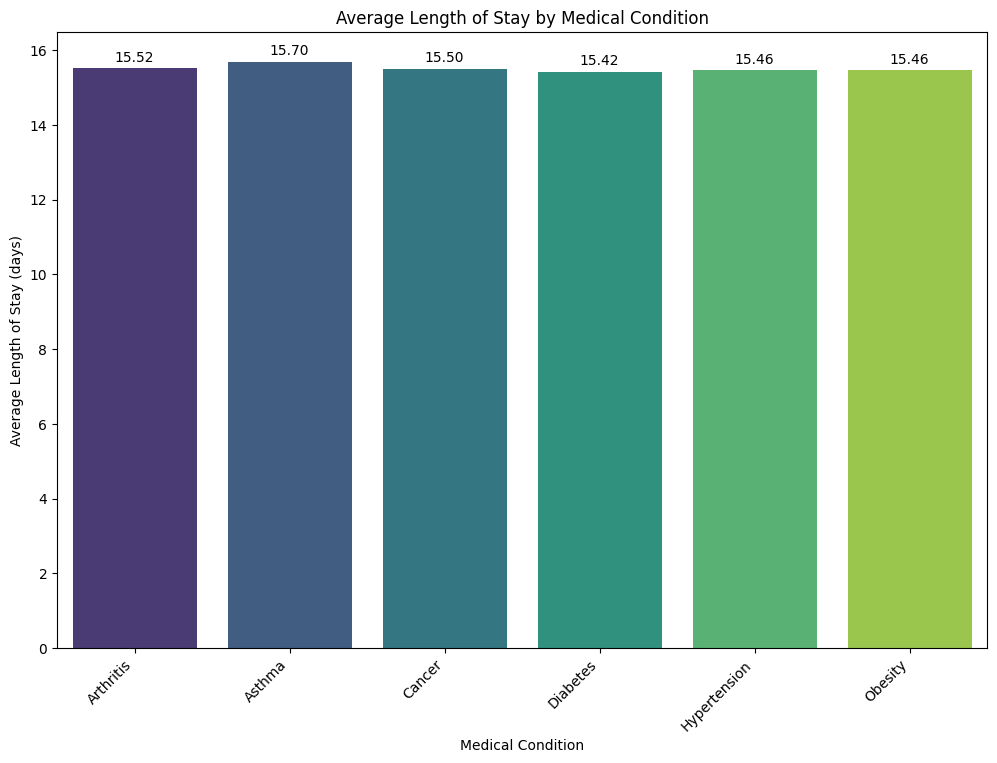

In [36]:
# Length of stay analysis
length_of_stay_analysis = df.groupby('Medical Condition')['Length of Stay'].mean().reset_index()

# Plotting Length of Stay by Medical Condition
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Medical Condition', y='Length of Stay', data=length_of_stay_analysis, palette='viridis')
plt.title('Average Length of Stay by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Average Length of Stay (days)')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height:.2f}', ha='center', va='bottom')

plt.show()

<h4>Factor Analysis</h4>

C:\Users\ahmad\AppData\Local\Temp\ipykernel_12624\2695210991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Admission Type', y='Length of Stay', data=length_of_stay_by_admission, palette='coolwarm')


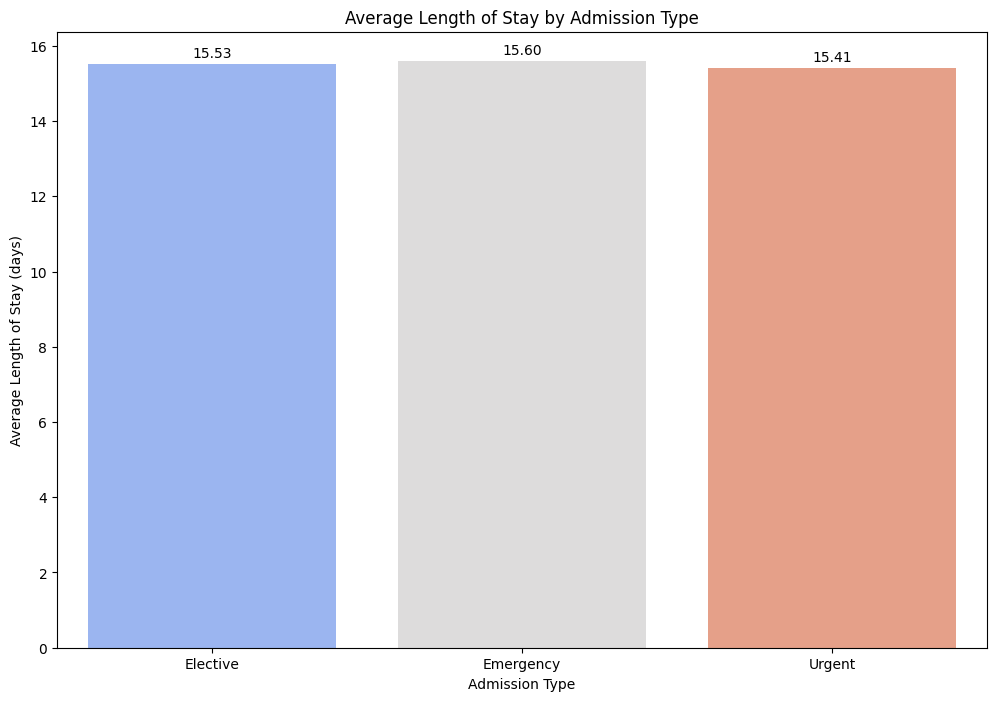

In [39]:
# Calculate average length of stay by admission type
length_of_stay_by_admission = df.groupby('Admission Type')['Length of Stay'].mean().reset_index()

# Plotting Length of Stay by Admission Type
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Admission Type', y='Length of Stay', data=length_of_stay_by_admission, palette='coolwarm')
plt.title('Average Length of Stay by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Average Length of Stay (days)')

# Annotate each bar with its value
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height:.2f}', ha='center', va='bottom')

plt.show()